   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Class Labels Encoded As: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
K = 1 | Accuracy = 1.00


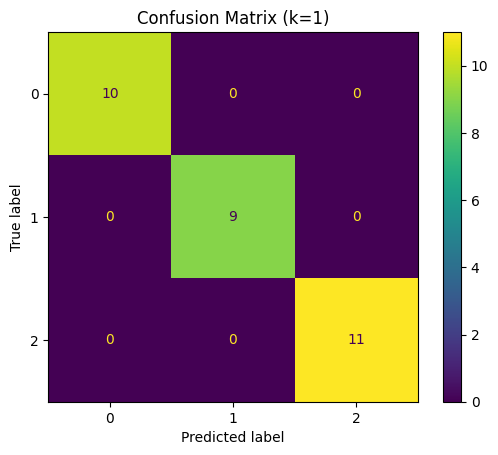

K = 3 | Accuracy = 1.00


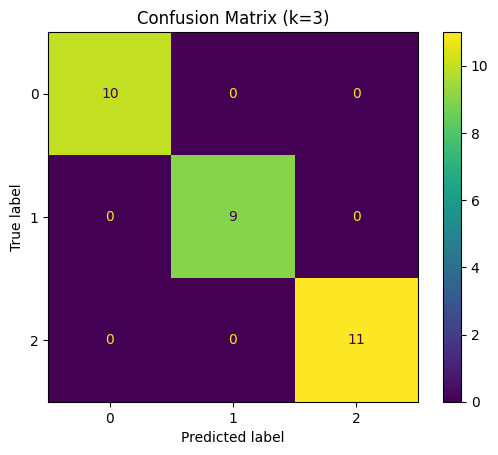

K = 5 | Accuracy = 1.00


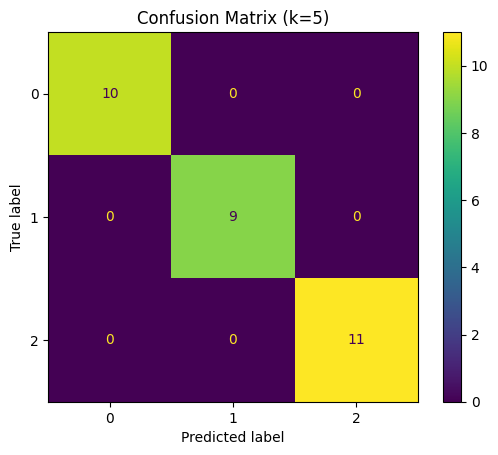

K = 7 | Accuracy = 1.00


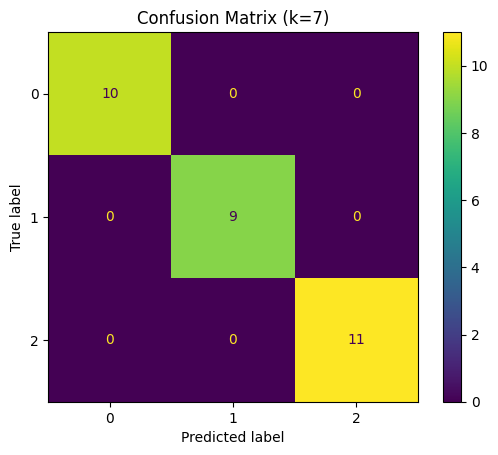

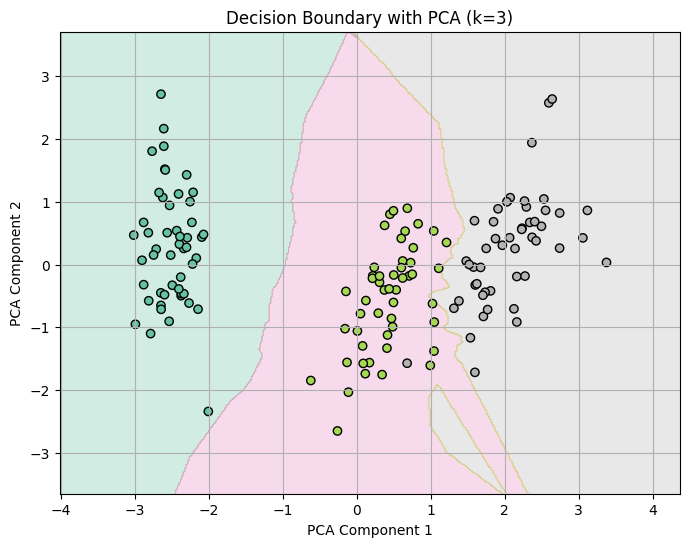

In [2]:
# Step 1: Upload CSV File
from google.colab import files
uploaded = files.upload()

# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Step 3: Load CSV and Prepare Data
# Replace 'iris.csv' with the actual uploaded filename if different
df = pd.read_csv('/content/Iris.csv')

# Display first few rows
print(df.head())

# Separate features and target
X = df.iloc[:, :-1].values         # All columns except the last
y = df.iloc[:, -1].values          # Last column as target

# Encode target labels if they are strings
le = LabelEncoder()
y = le.fit_transform(y)
print("Class Labels Encoded As:", dict(zip(le.classes_, le.transform(le.classes_))))

# Step 4: Normalize and Split Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train and Evaluate KNN with Different K Values
k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} | Accuracy = {acc:.2f}")

    ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
    plt.title(f'Confusion Matrix (k={k})')
    plt.show()

# Step 6: Visualize Decision Boundary (Using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train KNN again on full PCA-reduced data
best_k = 3
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_pca, y)

# Create meshgrid
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Set2, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set2, edgecolor='k')
plt.title(f'Decision Boundary with PCA (k={best_k})')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()



# 🧠 K-Nearest Neighbors (KNN) – Interview Questions & Answers

---

## 1️⃣ How does the KNN algorithm work?

KNN is a **lazy, instance-based learning algorithm**. It makes predictions for a new data point by:
- Calculating distances from the new point to all points in the training set.
- Selecting the **K nearest neighbors** (smallest distances).
- Taking a **majority vote** (for classification) or **mean** (for regression) of their labels.

---

## 2️⃣ How do you choose the right K?

- Small K (e.g., 1 or 3): More sensitive to noise and overfitting.
- Large K (e.g., 15 or 20): May underfit by oversmoothing boundaries.
- Use techniques like **cross-validation** to test different K values and choose the one with highest validation accuracy.

---

## 3️⃣ Why is normalization important in KNN?

KNN is based on **distance calculations**. If features are on different scales (e.g., height in cm vs. income in lakhs), the larger scale dominates. **Standardization or Min-Max scaling** ensures that each feature contributes equally to the distance.

---

## 4️⃣ What is the time complexity of KNN?

- **Training time**: 🟢 O(1) — No training phase; it simply stores the dataset.
- **Prediction time**: 🔴 O(n × d) — For each test point, distance to all `n` training points (each with `d` features) is computed.

---

## 5️⃣ What are pros and cons of KNN?

✅ **Pros**:
- Simple to implement.
- No training needed.
- Effective for small datasets with well-separated classes.

❌ **Cons**:
- Slow prediction for large datasets.
- Sensitive to irrelevant/noisy features.
- Requires scaling and good choice of K.

---

## 6️⃣ Is KNN sensitive to noise?

Yes. If K is small, a noisy point (wrong label) can influence the result.
Using larger K or **distance-weighted voting** helps reduce this sensitivity.

---

## 7️⃣ How does KNN handle multi-class problems?

KNN naturally supports multi-class classification.
- It counts the votes from K neighbors, regardless of how many classes exist.
- The class with the **most votes** among neighbors is assigned to the new point.

---

## 8️⃣ What’s the role of distance metrics in KNN?

The **distance metric determines how "nearness" is calculated**. Common metrics:
- **Euclidean** (default): Straight-line distance.
- **Manhattan**: Grid-like path (L1 norm).
- **Minkowski**: Generalized distance (p-norm).
- **Cosine**: Measures angle (good for text/sparse data).

The choice affects the quality of neighbors selected, and hence accuracy.

---
